In [1]:
# Import main packages 
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools, getdate
import time
import argparse
import os
from pathlib import Path


/opt/miniconda3/envs/tilepyenv_1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Set of inputs needed to run the code

In [3]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'nucascade'

# The url to the FITS file with the sky localization in a healpix format
skymap = 'https://roc.icecube.wisc.edu/public/hese_cascades/hese_60448_run00139414.evt000034468187.fits'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
#obsTime = getdate("2023-12-06  23:39:01")
#obsTime = getdate("2024-04-13  02:33:01")
obsTime = getdate("2023-06-10 14:51:47")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
cfgFile = '../config/FollowupParameters_CTAON.ini'

# Tiles already observed
pointingsFile = None
pointingsFile = '/Users/mseglar/GitHub/tilepy/examples/launcher/output/hese_60448/PGinFoV/SuggestedPointings_2DProbOptimisation.txt'



In [4]:
# Create forder for output
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [5]:
#Parse the parameters 
obspar = ObservationParameters()
obspar.add_parsed_args(skymap,obsTime,datasetDir,None,outDir,pointingsFile,alertType)
obspar.from_configfile(cfgFile)

### Run the scheduling

In [6]:
# Run the scheduler
from tilepy.include.PointingTools import GetSkymap
from astropy.io import fits
fitsfile = fits.open(skymap)


it is a url
The map is MO? = False
Reducing HRnside to the value from the original map: NSIDE= 128
Starting the 2D pointing calculation with the following parameters

Filename:  hese_60448
Date:  2023-06-10 14:51:47
Previous pointings:  /Users/mseglar/GitHub/tilepy/examples/launcher/output/hese_60448/PGinFoV/SuggestedPointings_2DProbOptimisation.txt
Dataset:  ../../tilepy/dataset/
Output:  ./output/hese_60448

============== Main parsed observation parameters ==============  
Observatory Name: CTAO-N
Observatory: 28.75 deg
Observatory: -17.5 deg
Observatory: 2200.0 m
Max zenith: 70
Using Greytime is: False
FOV: 2.0
Max runs: 20
Duration: 15
High Resolution NSIDE: 128
Low Resolution NSIDE: 128
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)


-------------------   NEW EVENT   --------------------

Loading map from  https://roc.icecube.wisc.edu/public/hese_cascades/hese_60448_run00139414.evt000034468187.fits
Loading HEALPix map from f

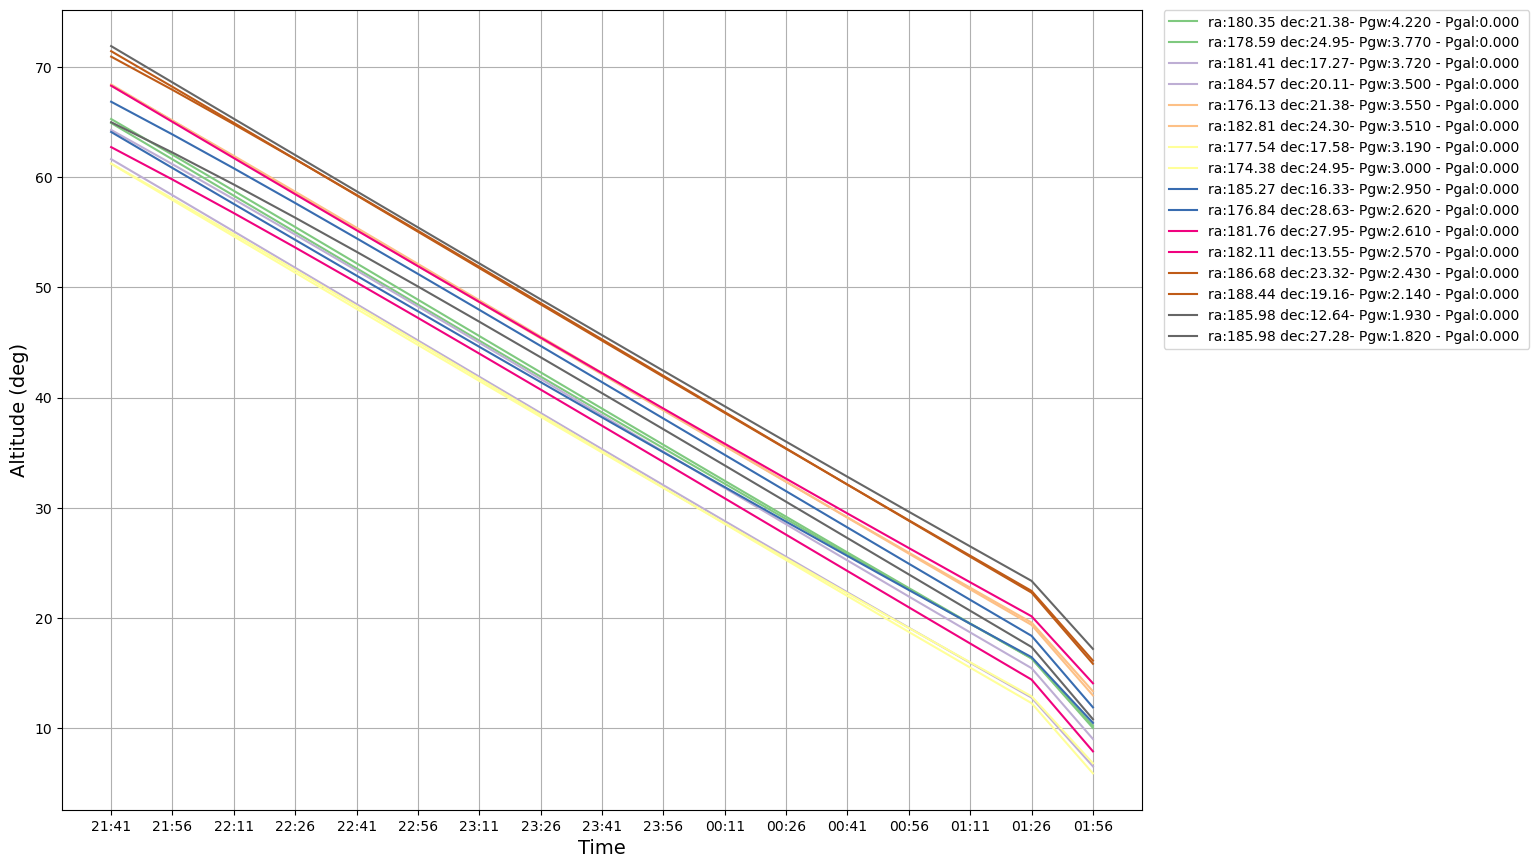

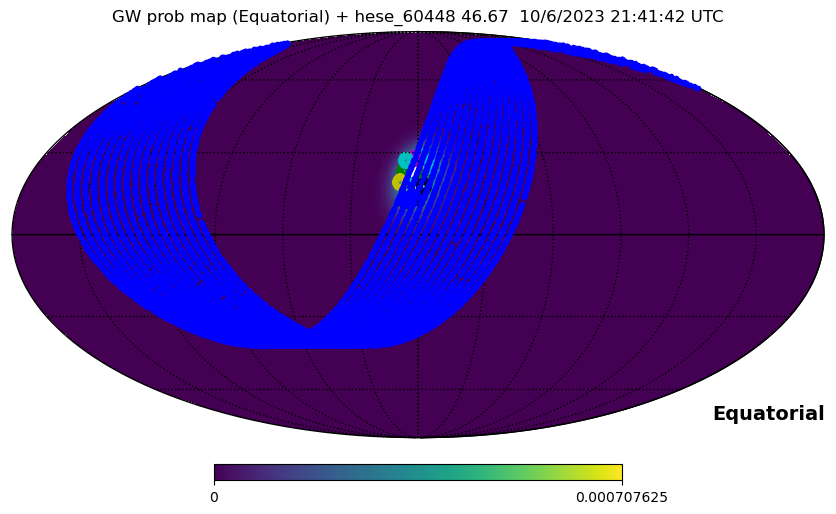

In [7]:
# Run the scheduler
GetSchedule(obspar)